In [1]:
import torch
from torchvision.models import resnet50
import model_utils
import plotter
import data_utils
import torch.nn as nn
from torch.utils.data import DataLoader, Subset, ConcatDataset
import importlib
import pandas as pd
import torchvision.transforms as transforms


model_utils.fix_random(42)

c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt")
df_stats = data_utils.get_dataset_stats(dataset)
pd.DataFrame.from_dict(df_stats, orient='index')

# size of image to resize
IMG_SIZE = 224

In [3]:
transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert('RGB')),
    transforms.Resize(IMG_SIZE),            # Resize the shorter side to 128 while keeping aspect ratio
    transforms.Lambda(data_utils.pad_to_square),  # Apply the dynamic padding to make the image square
    transforms.Resize((IMG_SIZE, IMG_SIZE)),     # Ensure the final image is exactly 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing "should" help with Pretrained nets
])

dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt", transform=transform)

LEARNING_RATE = 3e-4
EPOCHS = 20
BATCH_SIZE = 32

train_dataset, val_dataset, test_dataset = data_utils.train_test_split((0.7, 0.10), dataset=dataset)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

loss_fn = nn.BCEWithLogitsLoss()
device = model_utils.get_device()
print(f"using {device} device")

dataloaders = (train_dataloader, val_dataloader)

using cuda device


In [4]:
ft_resnet50 = resnet50(weights='IMAGENET1K_V1')
model_utils.prepare_for_ft(ft_resnet50, num_classes=1)
ft_resnet50.to(device)

optimizer = torch.optim.AdamW(ft_resnet50.fc.parameters(), lr=LEARNING_RATE)

In [5]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, "FTRes50_newdata", BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=True)

Epoch 1/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 66.0%, Avg loss: 0.664958
New best model found! (based on lowest loss)
...and saved.


Epoch 2/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 56.7%, Avg loss: 0.696078


Epoch 3/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 57.7%, Avg loss: 0.585608
New best model found! (based on lowest loss)
...and saved.


Epoch 4/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.676911


Epoch 5/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 62.9%, Avg loss: 0.585527
New best model found! (based on lowest loss)
...and saved.


Epoch 6/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 0.529589
New best model found! (based on lowest loss)
...and saved.


Epoch 7/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.562161


Epoch 8/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.664610


Epoch 9/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.499079
New best model found! (based on lowest loss)
...and saved.


Epoch 10/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.561639


Epoch 11/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.524087


Epoch 12/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.540385


Epoch 13/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 75.3%, Avg loss: 0.532579


Epoch 14/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 0.596819


Epoch 15/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 0.645708


Epoch 16/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.808391


Epoch 17/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 0.518702


Epoch 18/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 0.534083


Epoch 19/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 0.431414
New best model found! (based on lowest loss)
...and saved.


Epoch 20/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.651532




Test Error:
Accuracy: 75.8%, Avg loss: 0.490390
Confusion matrix report, tp: 58, fp: 27, fn: 20, tn:89


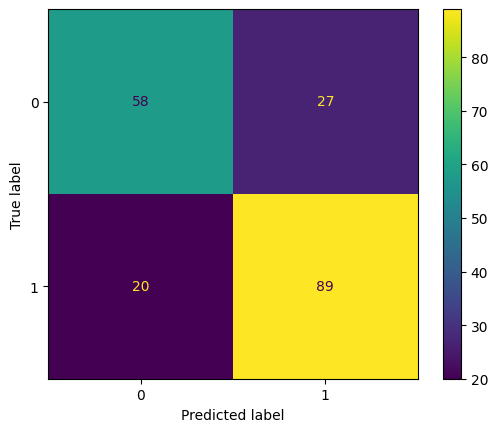

Precision: 0.68, Recall: 0.74, F1-Score: 0.71


(0.49038950886045185, tensor(0.7577, device='cuda:0'))

In [10]:
model_name = "best_FTRES50_newdata"
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device, model_name=model_name, visualize=True)

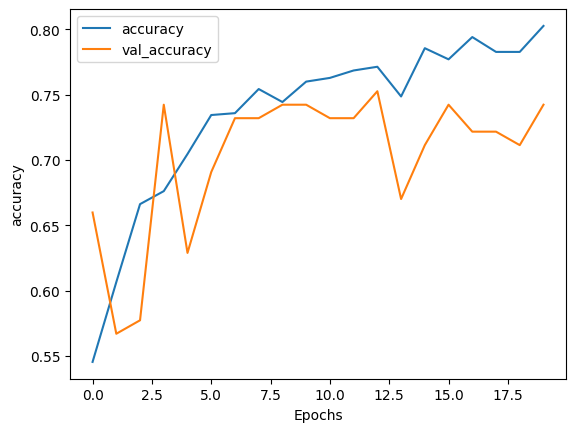

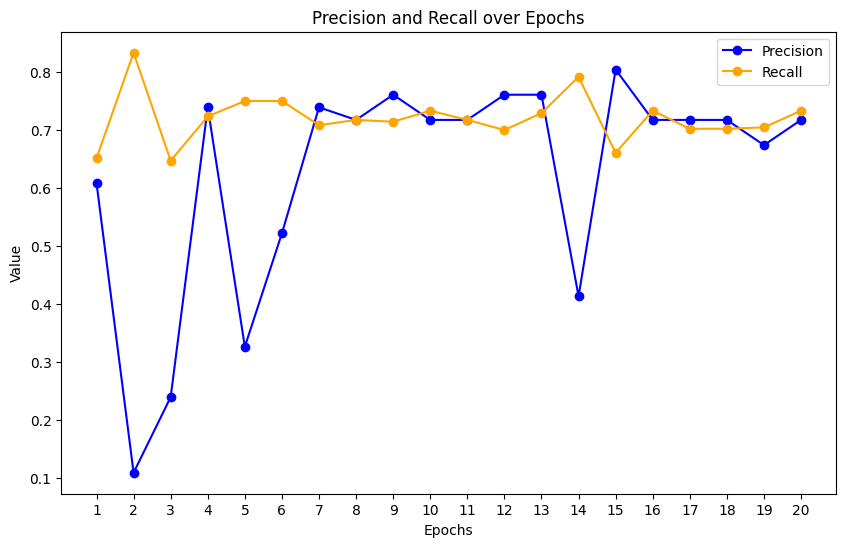

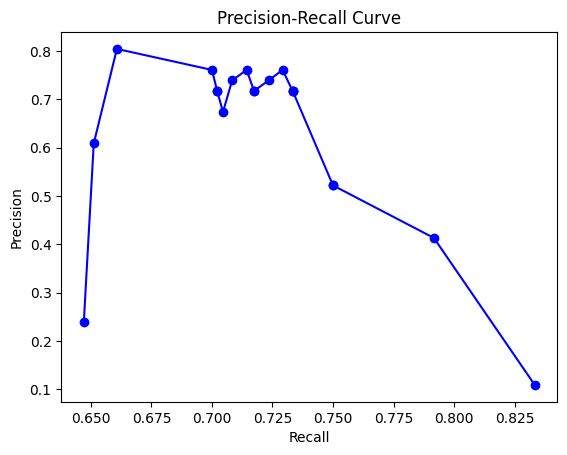

In [14]:
if artifacts != None:
    losses, train_accs, test_accs, precisions, recalls = artifacts
    plotter.plot_metrics((train_accs, test_accs), "accuracy", model_name)
    plotter.plot_precision_recall_curve(precisions, recalls, model_name)

Step2 FT

In [15]:
for param in ft_resnet50.parameters():
    param.requires_grad = True


optimizer = torch.optim.AdamW(ft_resnet50.parameters(), lr=LEARNING_RATE)

In [16]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, "FTRes50NewData_beefy", BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=False)

Epoch 1/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 54.6%, Avg loss: 1.800762
New best model found! (based on lowest loss)
...and saved.


Epoch 2/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 0.501493
New best model found! (based on lowest loss)
...and saved.


Epoch 3/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 61.9%, Avg loss: 0.908856


Epoch 4/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 63.9%, Avg loss: 1.517429


Epoch 5/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 3.658024


Epoch 6/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 62.9%, Avg loss: 0.949066


Epoch 7/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 0.685880


Epoch 8/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 61.9%, Avg loss: 1.459019


Epoch 9/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 64.9%, Avg loss: 1.091977


Epoch 10/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 63.9%, Avg loss: 1.085707


Epoch 11/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 70.1%, Avg loss: 1.005681


Epoch 12/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 63.9%, Avg loss: 1.062183


Epoch 13/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 66.0%, Avg loss: 0.865965


Epoch 14/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 63.9%, Avg loss: 2.977852


Epoch 15/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 0.914643


Epoch 16/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 0.800273


Epoch 17/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 64.9%, Avg loss: 1.131214


Epoch 18/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 70.1%, Avg loss: 3.015840


Epoch 19/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 1.214895


Epoch 20/20
-------------------------------


c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 0.804810




Test Error:
Accuracy: 83.0%, Avg loss: 0.439606
Confusion matrix report, tp: 65, fp: 20, fn: 13, tn:96


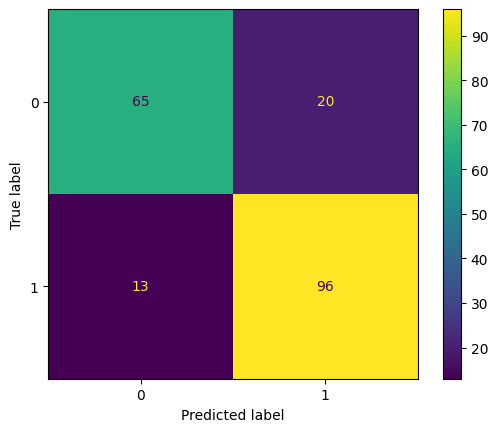

Precision: 0.76, Recall: 0.83, F1-Score: 0.80


(0.43960640685898916, tensor(0.8299, device='cuda:0'))

In [17]:
model_name = "best_FTRes50NewData_beefy"
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device, model_name=model_name, visualize=True)

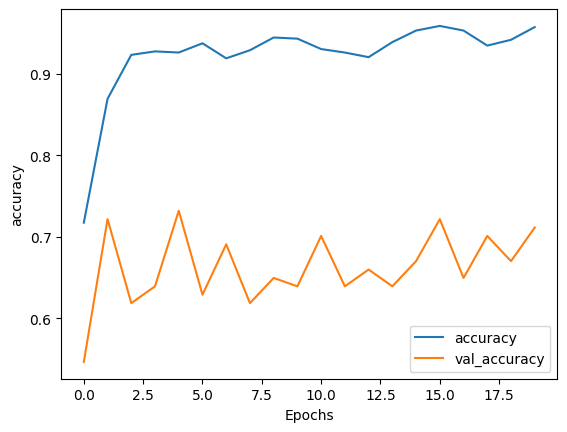

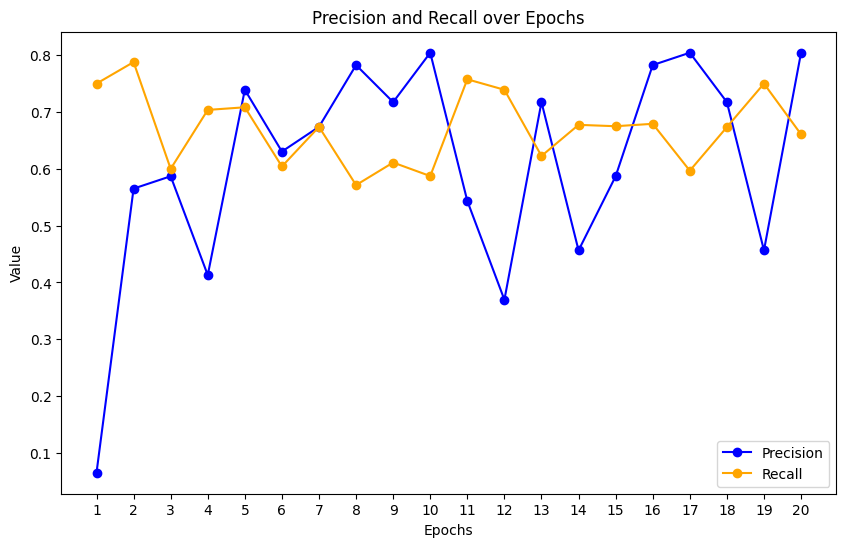

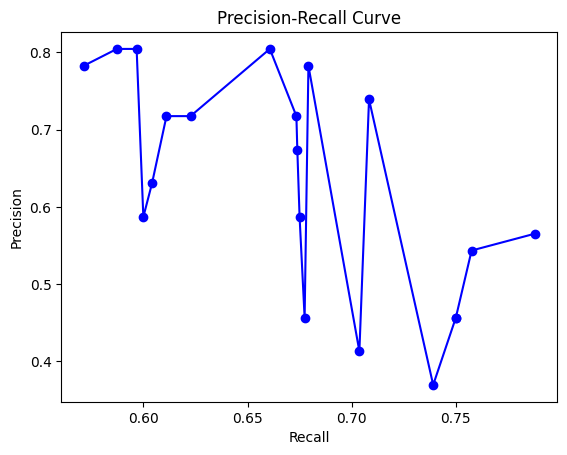

In [18]:
if artifacts != None:
    losses, train_accs, test_accs, precisions, recalls = artifacts 
    plotter.plot_metrics((train_accs, test_accs), "accuracy", model_name)
    plotter.plot_precision_recall_curve(precisions, recalls, model_name)

GradCAM Test

100%|██████████| 64/64 [00:09<00:00,  6.84it/s]


<class 'numpy.ndarray'>


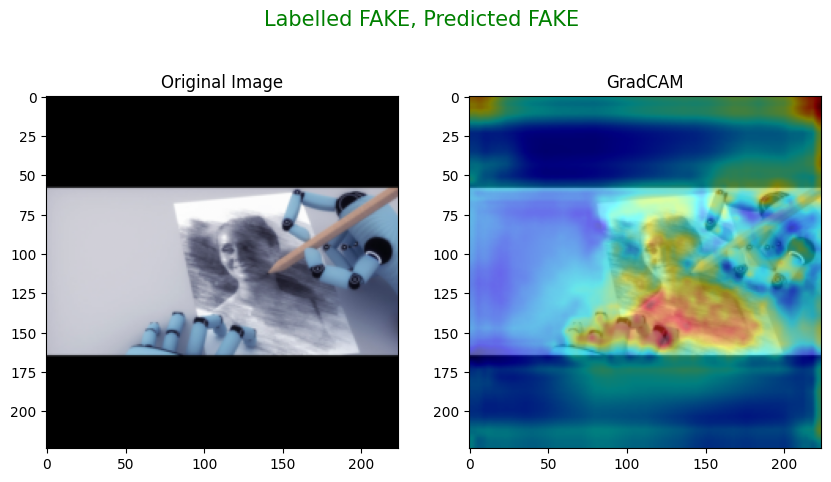

In [5]:
import xai
chp = torch.load('models/best_FTRES50_newdata.pth', weights_only=True)
ft_resnet50.load_state_dict(chp)
importlib.reload(xai)
xai.explain_gradcam_single_image(train_dataloader,
                                ft_resnet50, [ft_resnet50.layer1, ft_resnet50.layer2, ft_resnet50.layer3, ft_resnet50.layer4],
                                index = 3)

100%|██████████| 64/64 [00:04<00:00, 15.48it/s]


<class 'numpy.ndarray'>


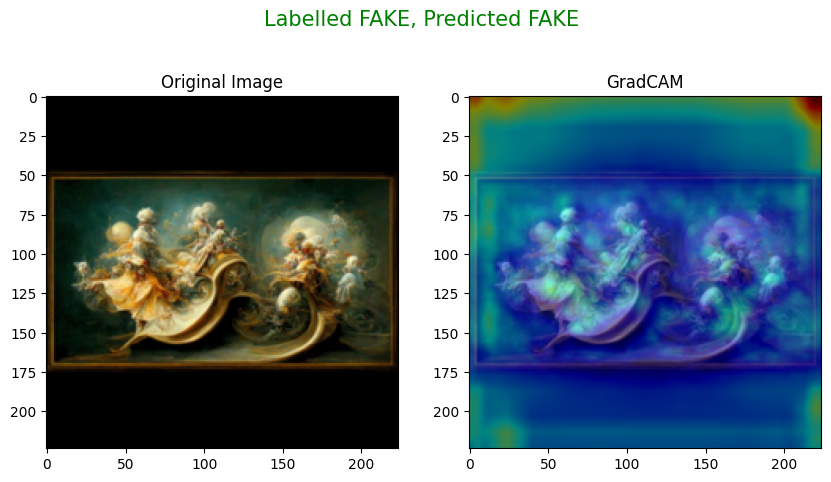

In [6]:
xai.explain_gradcam_single_image(test_dataloader,
                                ft_resnet50, [ft_resnet50.layer1, ft_resnet50.layer2, ft_resnet50.layer3, ft_resnet50.layer4],
                                index = 2)

### Data Augmentation Experiment
ignore if it not worky welly.

In [79]:
augmented_transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert('RGB')),
    transforms.RandomResizedCrop(size=(224, 224)),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flip
    transforms.RandomRotation(20),  # Randomly rotate the image by up to 20 degrees
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


In [89]:
original_dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt", transform=transform)
augmented_dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt", transform=augmented_transform)


augmented_size = int(0.3 * len(original_dataset))

import numpy as np

augmented_indices = np.random.choice(len(augmented_dataset), augmented_size, replace=False)
augmented_subset = Subset(augmented_dataset, augmented_indices)

# Combine the subsets
combined_dataset = ConcatDataset([original_dataset, augmented_dataset])

train_dataset, val_dataset, test_dataset = data_utils.train_test_split((0.7, 0.10), dataset=combined_dataset)


train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

dataloaders = (train_dataloader, val_dataloader)

In [90]:
ft_resnet50 = resnet50(weights='IMAGENET1K_V1')
model_utils.prepare_for_ft(ft_resnet50, num_classes=1)
ft_resnet50.to(device)

optimizer = torch.optim.AdamW(ft_resnet50.fc.parameters(), lr=LEARNING_RATE)

In [91]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, "FTRes50_experiment", BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=True)

Epoch 1/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


training loss: 0.656924, train accuracy: 56.02%  [ 1280/ 1358]
Validation Error:
Accuracy: 55.7%, Avg loss: 0.653590 

new best model found
best model saved
Epoch 2/20
-------------------------------
training loss: 0.627739, train accuracy: 65.16%  [ 1280/ 1358]
Validation Error:
Accuracy: 68.0%, Avg loss: 0.609734 

new best model found
best model saved
Epoch 3/20
-------------------------------
training loss: 0.565737, train accuracy: 67.81%  [ 1280/ 1358]
Validation Error:
Accuracy: 72.2%, Avg loss: 0.603620 

new best model found
best model saved
Epoch 4/20
-------------------------------
training loss: 0.549854, train accuracy: 70.00%  [ 1280/ 1358]
Validation Error:
Accuracy: 59.3%, Avg loss: 0.595899 

new best model found
best model saved
Epoch 5/20
-------------------------------
training loss: 0.555162, train accuracy: 70.86%  [ 1280/ 1358]
Validation Error:
Accuracy: 69.6%, Avg loss: 0.569198 

new best model found
best model saved
Epoch 6/20
-------------------------------


c:\Users\tekke\ethics_project2\model_utils.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_filename))


In [92]:
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device)

Test Error:
Accuracy: 72.7%, Avg loss: 0.550447 



(0.5504472164007334, tensor(0.7268, device='cuda:0'))

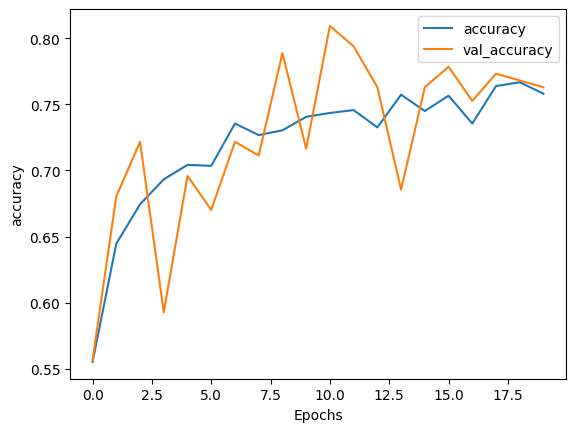

In [93]:
if artifacts != None:
    losses, train_accs, test_accs = artifacts
    plotter.plot_metrics((train_accs, test_accs), "accuracy")

In [94]:
for param in ft_resnet50.parameters():
    param.requires_grad = True


optimizer = torch.optim.AdamW(ft_resnet50.parameters(), lr=LEARNING_RATE)

In [98]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, "FTRes50_expriment_beefy", BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=True)

Epoch 1/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


training loss: 0.412510, train accuracy: 75.23%  [ 1280/ 1358]
Validation Error:
Accuracy: 79.4%, Avg loss: 0.463510 

new best model found
best model saved
Epoch 2/20
-------------------------------
training loss: 0.444755, train accuracy: 83.12%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.3%, Avg loss: 0.518716 

Epoch 3/20
-------------------------------
training loss: 0.388076, train accuracy: 85.62%  [ 1280/ 1358]
Validation Error:
Accuracy: 81.4%, Avg loss: 0.324324 

new best model found
best model saved
Epoch 4/20
-------------------------------
training loss: 0.189549, train accuracy: 87.42%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.3%, Avg loss: 0.655975 

Epoch 5/20
-------------------------------
training loss: 0.383974, train accuracy: 86.88%  [ 1280/ 1358]
Validation Error:
Accuracy: 81.4%, Avg loss: 0.344421 

Epoch 6/20
-------------------------------
training loss: 0.199485, train accuracy: 89.14%  [ 1280/ 1358]
Validation Error:
Accuracy: 75.3%, Avg loss: 0.6308

c:\Users\tekke\ethics_project2\model_utils.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_filename))


In [99]:
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device)

Test Error:
Accuracy: 83.5%, Avg loss: 0.468671 



(0.4686706020281865, tensor(0.8351, device='cuda:0'))

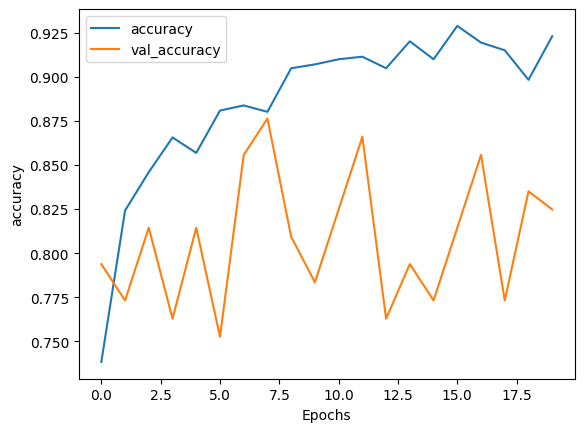

In [100]:
if artifacts != None:
    losses, train_accs, test_accs = artifacts 
    plotter.plot_metrics((train_accs, test_accs), "accuracy")